## Выполнение тестового задания

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Импорт данных

In [2]:
cg1 = pd.read_csv('data/portrait_CG1.csv', index_col='user_id', sep=';')
cg2 = pd.read_csv('data/portrait_CG2.csv', index_col='user_id', sep=';')
tg = pd.read_csv('data/portrait_TG.csv', index_col='user_id', sep=';')

Сокращения

In [3]:
rd = 'retention_days'
tr = 'total_revenue'

is_s = 'is_special'
was_s = 'was_special'

lables = ['Контрольная группа 1', 'Контрольная группа 2', 'Тестовая группа']

Функция подсчета ненулевых значений в заданном столбце

In [4]:
def count_non_zero(d, column):
    return len(d[d[column]!=0][column])

## Предобработка
Заменяем список дней после регистрации, в которые пользователь заходил в
приложение, на количество этих дней

In [5]:
def retention_count(row):
    if str(row[rd]) == '0' or str(row[rd]) == 'nan':
        return 0                                              
    return len(str(row[rd]).split(','))


cg1[rd] = cg1.apply(retention_count, axis=1)
cg2[rd] = cg2.apply(retention_count, axis=1)
tg[rd] = tg.apply(retention_count, axis=1)

Заполняем пустые ячейки значением 0

In [6]:
def fill_empty_with_zeros(df):
    empty_columns = df.columns[df.isna().any()].tolist()
    for i in empty_columns:
        df[i] = df[i].fillna(0).astype(int)
        
        
fill_empty_with_zeros(cg1)
fill_empty_with_zeros(cg2)
fill_empty_with_zeros(tg)


## Анализ
Функция для расчета медианной прибыли с человека

In [7]:
def median_revenue (df):
    return df[df[tr]!=0][tr].median()

print("Медиальная прибыль с человека для Контрольной группы 1:", median_revenue(cg1))
print("Медиальная прибыль с человека для Контрольной группы 2:", median_revenue(cg2))
print("Медиальная прибыль с человека для тестовой группы:", median_revenue(tg))

Медиальная прибыль с человека для Контрольной группы 1: 9314.5
Медиальная прибыль с человека для Контрольной группы 2: 7969.0
Медиальная прибыль с человека для тестовой группы: 12727.0


Определим соотношение пользователей с премиум статусом в каждой выборке

In [8]:
users = [len(cg1), len(cg2), len(tg)]
is_prem_users = [count_non_zero(cg1, is_s), count_non_zero(cg2, is_s), count_non_zero(tg, is_s)]
was_prem_users = [count_non_zero(cg1, was_s), count_non_zero(cg2, was_s), count_non_zero(tg, was_s)]
profit_per_groop = [cg1[tr].sum(), cg2[tr].sum(), tg[tr].sum()]


def premium_percent (df):
    return (100*df[is_s].astype(bool).sum(axis=0) / int(len(df)))
        
def subscription_renewal_percent (df):
    return (100*df[is_s].astype(bool).sum(axis=0) / df[was_s].astype(bool).sum(axis=0))    
    
    
    
# процент премиум пользователей
premium_users = [premium_percent(cg1), premium_percent(cg2), premium_percent(tg)]
# количество сохранивших премиум
premium_renewal = [subscription_renewal_percent(cg1), subscription_renewal_percent(cg2), subscription_renewal_percent(tg)]
# медианный профит на человека
median_profit = [median_revenue(cg1), median_revenue(cg2), median_revenue(tg)]


# ожидаемая прибыль со всей группы
excepted_profit_per_groop = [median_profit[i]*is_prem_users[i] for i in range(3)]

Определим количество премиум пользователей в контрольных и тестовой группах в процентах от общего числа людей в выборках

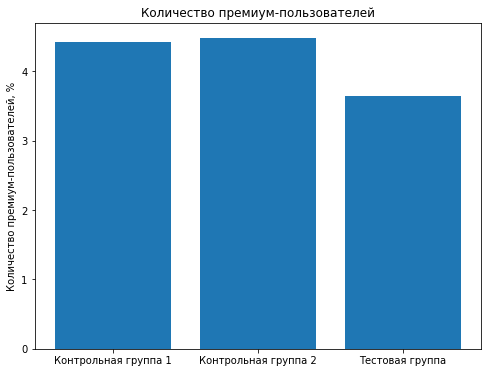

In [9]:
plt.figure(figsize=(8, 6))

 
plt.bar(lables, premium_users)

plt.xticks(np.arange(3), (lables))
plt.ylabel('Количество премиум-пользователей, %')
plt.title('Количество премиум-пользователей')
print('')

Процент премиум пользователей в выборках

In [10]:
premium_users

[4.423963133640553, 4.4793621013133205, 3.6443825441039928]

Из графика следует, что при незначительной разнице премиум пользователей в контрольных группах, в тестовой оно значительно ниже

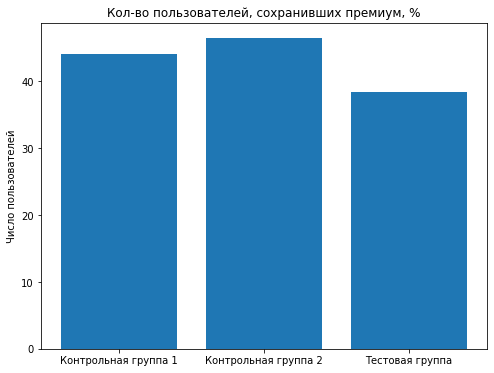

In [11]:
plt.figure(figsize=(8, 6))

plt.bar(lables, premium_renewal)

plt.xticks(np.arange(3), (lables))
plt.ylabel('Число пользователей')
plt.title('Кол-во пользователей, сохранивших премиум, %')
print('')

Число пользователей, пожелавших сохранить премиум

In [12]:
premium_renewal

[44.03669724770642, 46.4720194647202, 38.48039215686274]

## Выбросы
Для примера проверим данные по прибыли из первой контрольной группы

In [13]:
sorted_cg1_tr = cg1[cg1[tr]!=0][tr].sort_values()
print(sorted_cg1_tr)

user_id
960936960        26
891653790       728
891622389       767
891135642       962
891792453      1313
              ...  
892421277     60333
892366260     63024
891383310     63037
892216461     64298
892333905    486330
Name: total_revenue, Length: 192, dtype: int64


В таблице выше видно наличие краевых значений, сильно отклоняющихся от своих соседей.

Прибыль от одного человека: 486330
Прибыль от остальных: 2094937


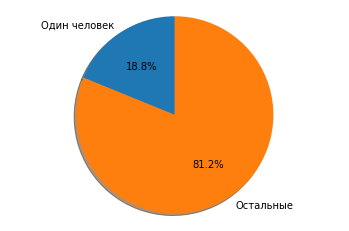

In [14]:
print("Прибыль от одного человека:", sorted_cg1_tr.values[-1])
print("Прибыль от остальных:", sorted_cg1_tr[:-1].sum())
labels = 'Один человек', 'Остальные'
sizes = [sorted_cg1_tr.values[-1], sorted_cg1_tr[:-1].sum()]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

На круговой диаграмме отображено влияние выброса в данных.


Построим гистограмму распределения прибыли от пользователей из первой контрольной группы.

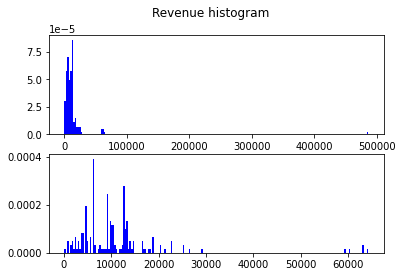

In [15]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Revenue histogram')

n, bins, patches = ax1.hist(sorted_cg1_tr, 200, density=True, facecolor='b')
ax2.hist(sorted_cg1_tr[:-1], 200, density=True, facecolor='b')

print('')

На верхней гистограмме можно наблюдать выброс в районе 500 тыс.

Нижняя гистограмма отображает аналогичные значения без выброса.

Из-за наличия выбросов, будем использовать медиану в качестве показателя среднего, так как она защищена от влияния ошибок и исключительных значений.

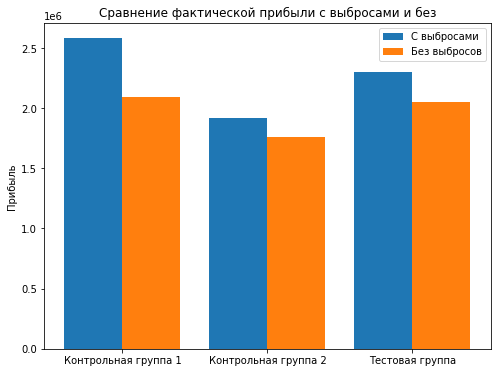

In [16]:
sorted_cg2_tr = cg2[cg2[tr]!=0][tr].sort_values()
sorted_tg_tr = tg[tg[tr]!=0][tr].sort_values()
sortet_tg = (sorted_cg1_tr[:-1].sum(), sorted_cg2_tr[:-2].sum(), sorted_tg_tr[:-2].sum())


x = np.arange(3) 
width = .4

plt.figure(figsize=(8, 6))
plt.bar(x-width/2, profit_per_groop, width) 
plt.bar(x+width/2, sortet_tg, width)
plt.xticks(np.arange(3), (lables))
plt.legend(['С выбросами', 'Без выбросов'])
plt.ylabel('Прибыль')
plt.title('Сравнение фактической прибыли с выбросами и без')
print('')

Устранение выбросов для подсчета прибыли со всей группы позволяет получить более объективную оценку. Это продемонстрировано на графике выше

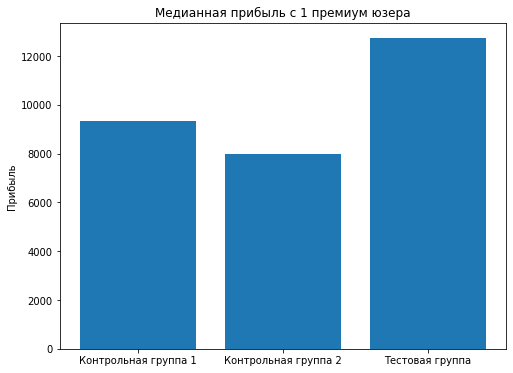

In [17]:
plt.figure(figsize=(8, 6))

plt.bar(lables, median_profit)

plt.xticks(np.arange(3), (lables))
plt.ylabel('Прибыль')
plt.title('Медианная прибыль с 1 премиум юзера')
print('')

Однако, если рассчитать прибыль, исключив выбросы, то можно увидеть, что в тестовой группе она выше

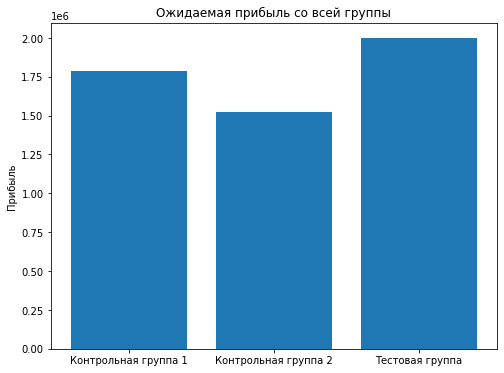

In [18]:
plt.figure(figsize=(8, 6))
plt.bar(lables, excepted_profit_per_groop)

plt.xticks(np.arange(3), (lables))
plt.ylabel('Прибыль')
plt.title('Ожидаемая прибыль со всей группы')
print('')

Ожидаемая прибыль рассчитывается как произведение медианной прибыли от одного премиум-пользователя на их кол-во

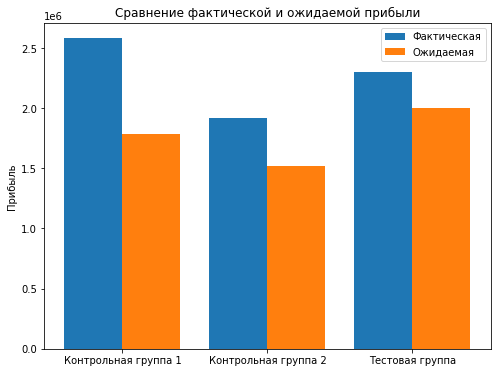

In [19]:
x = np.arange(3) 
width = .4

plt.figure(figsize=(8, 6))
plt.bar(x-width/2, profit_per_groop, width) 
plt.bar(x+width/2, excepted_profit_per_groop, width)
plt.xticks(np.arange(3), (lables))
plt.legend(['Фактическая', 'Ожидаемая'])
plt.ylabel('Прибыль')
plt.title('Сравнение фактической и ожидаемой прибыли')
print('')

# Вывод
В тестовой группе наблюдается снижение количетва пользователей с премиум-доступом, однако медианная выручка с таких пользователей повысилась.

Фактическая прибыль тестовой группы находится между значениями двух контрольных групп, однако, если исключить выбросы, тестовая группа показывает лучший результат.

Так же, тестовая группа выигрывает по ожидаемой прибыли, расчитываемой как произведение медианной прибыли на количество премиум-пользователей.

Исходя из этого можно сделать вывод, что эксперимент финансово удачен.